<a href="https://colab.research.google.com/github/arkothiwala/Analytics-Vidhya/blob/master/AV_Game_of_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import torch
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1zRzgwnzMs52MN674v6TFDOMrKi1jg6dN' #File ID for the required Trainingdata
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train-ship classification.zip')

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train-ship classification.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
train_csv = pd.read_csv('./data/train.csv')
train_csv.describe()

category
count  6252.000000
mean      2.657550
std       1.528998
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max       5.000000

In [6]:
train_csv.head()

image  category
0  2823080.jpg         1
1  2870024.jpg         1
2  2662125.jpg         2
3  2900420.jpg         3
4  2804883.jpg         2

In [0]:
import matplotlib.image as mpimg
img=mpimg.imread('./data/images/2823080.jpg')
#imgplot = plt.imshow(img)

In [27]:
for i in range(5):
  base_url = './data/images/'
  img=mpimg.imread(base_url+train_csv.sample().image.iloc[0])
  print(train_csv.sample().category.iloc[0])
  #imgplot = plt.imshow(img)
  #plt.show()

2
5
4
1
5


In [29]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [0]:
base_url = './data/images/'
img=mpimg.imread(base_url+train_csv.sample().image.iloc[0])
train_csv['raw'] = [mpimg.imread(base_url+image_url) for image_url in train_csv.image]

In [32]:
train_csv.head()

image  category                                                raw
0  2823080.jpg         1  [[[84, 153, 210], [84, 153, 210], [84, 153, 21...
1  2870024.jpg         1  [[[157, 157, 157], [153, 153, 153], [150, 150,...
2  2662125.jpg         2  [[[220, 219, 224], [220, 219, 224], [220, 219,...
3  2900420.jpg         3  [[[118, 140, 151], [136, 158, 169], [119, 143,...
4  2804883.jpg         2  [[[117, 152, 182], [118, 153, 183], [118, 153,...

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(train_csv.raw, train_csv.category, test_size=0.3)

In [39]:
train_Y.head()

2169    1
3612    1
194     3
1533    1
4225    1
Name: category, dtype: int64

In [46]:
train_csv.raw.shape

(6252,)

In [0]:
max_width = 0
max_height = 0
for image in train_csv.raw:
  max_width = max(image.shape[0], max_width)
  max_height = max(image.shape[1], max_height)

In [60]:
max_width

158

In [61]:
max_height

210

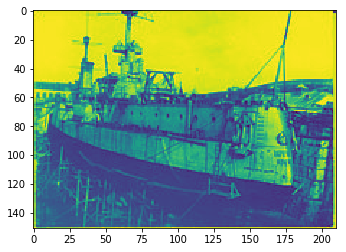

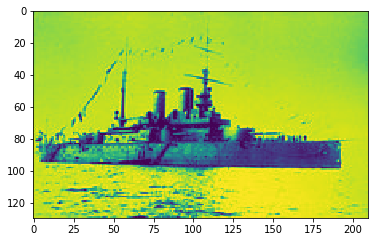

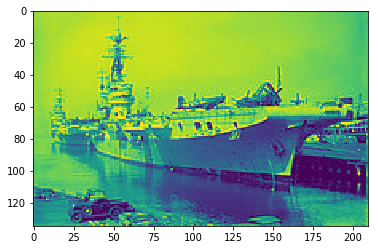

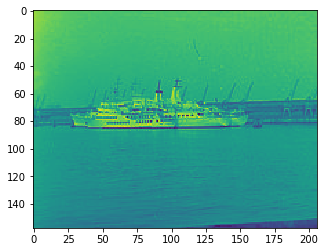

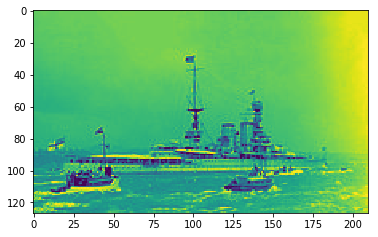

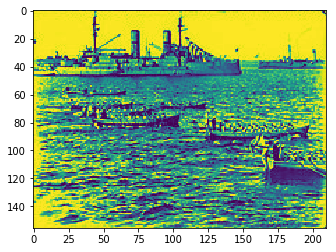

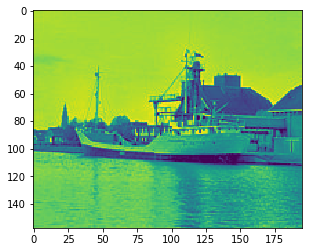

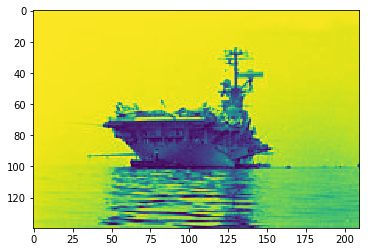

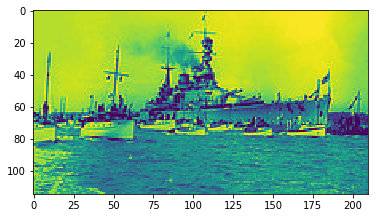

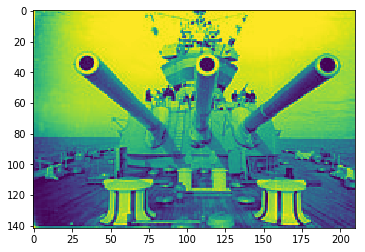

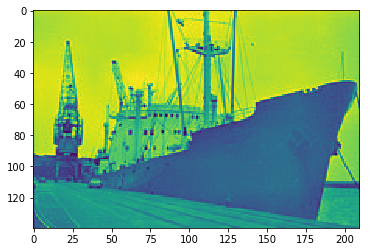

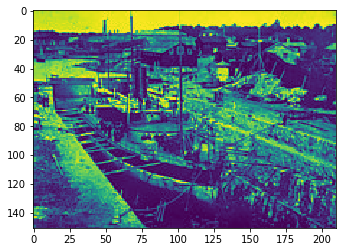

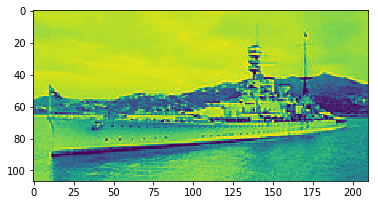

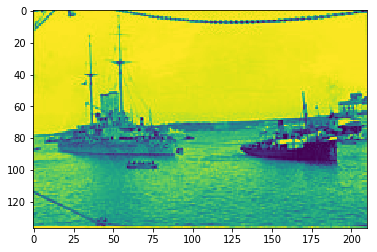

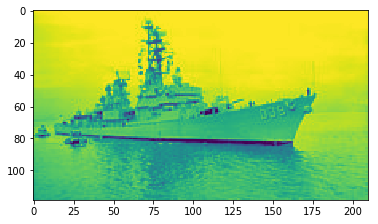

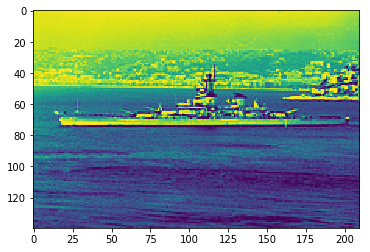

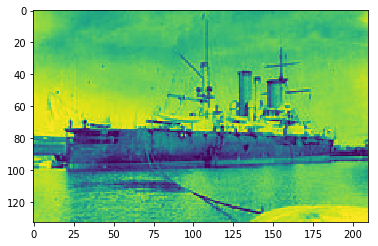

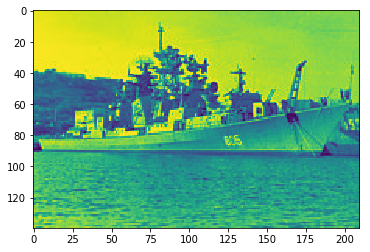

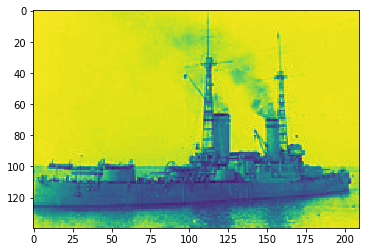

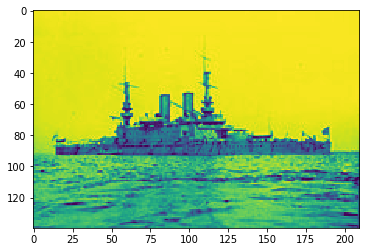

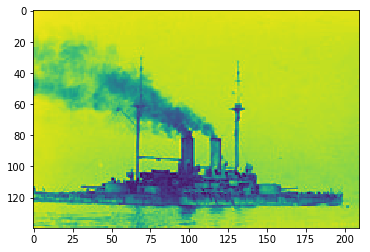

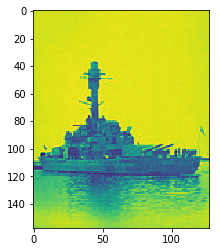

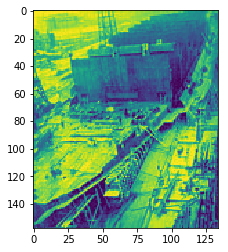

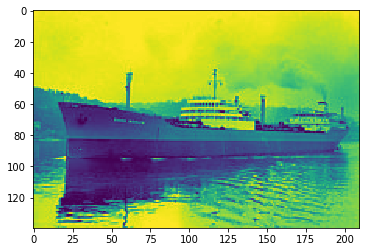

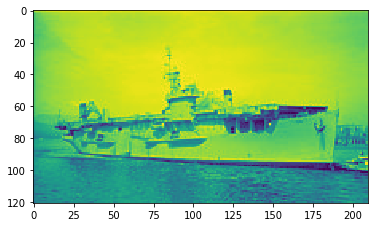

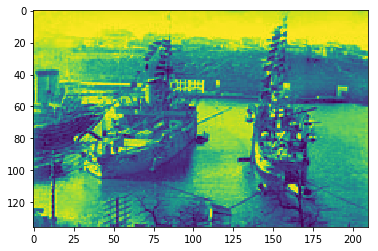

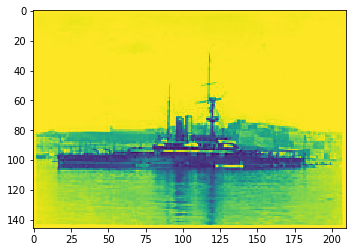

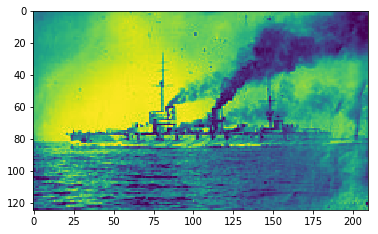

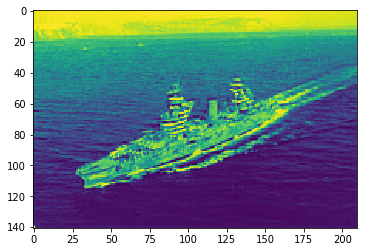

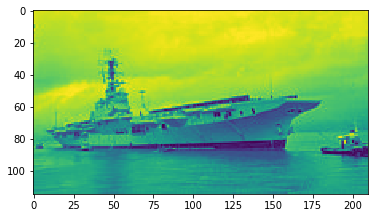

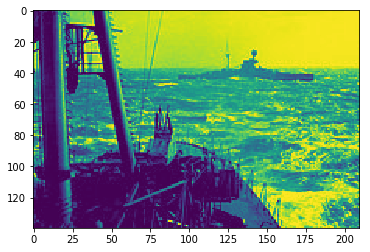

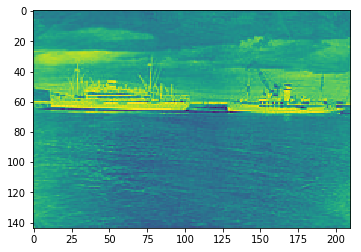

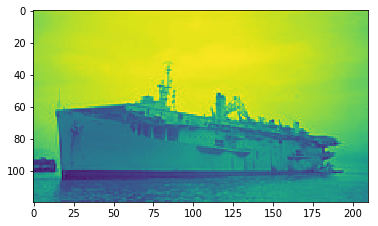

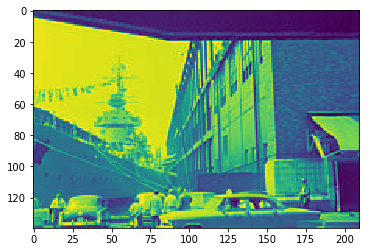

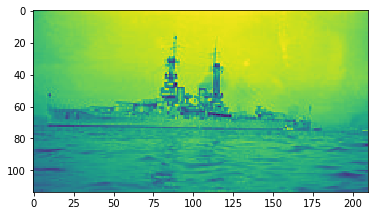

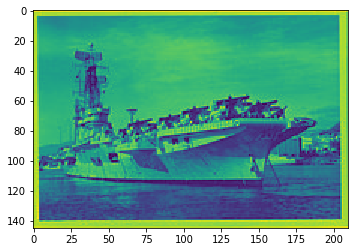

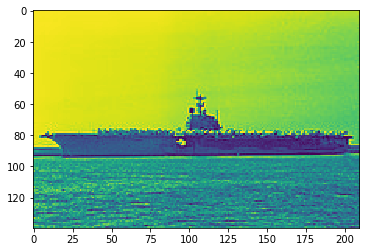

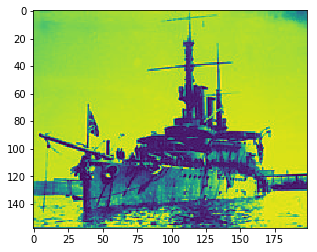

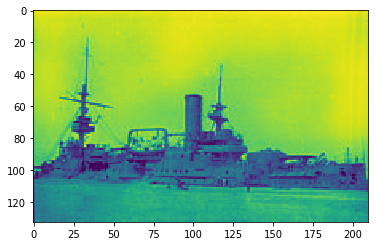

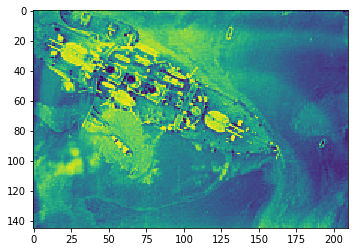

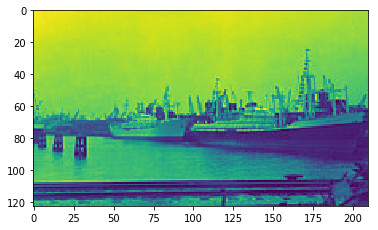

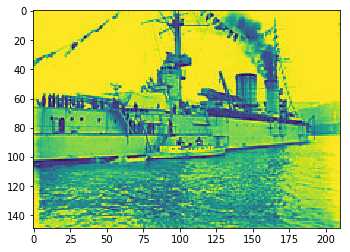

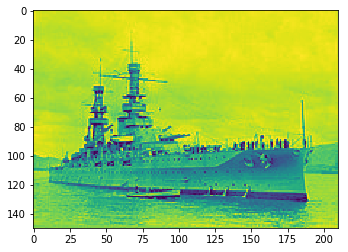

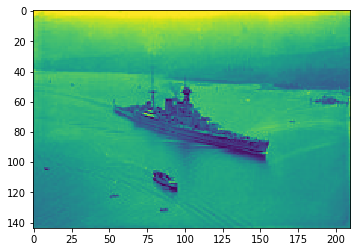

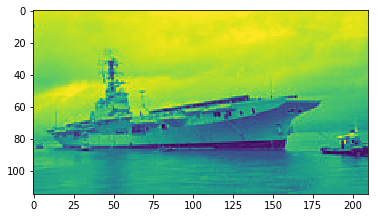

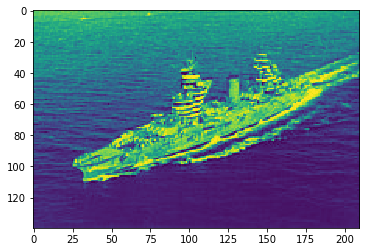

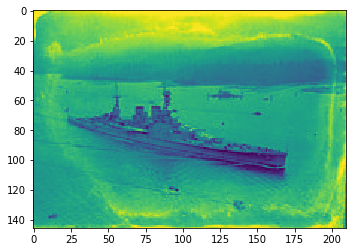

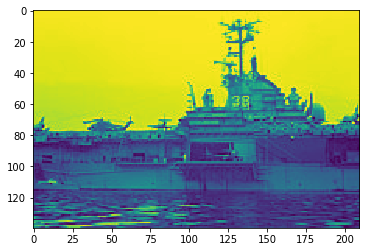

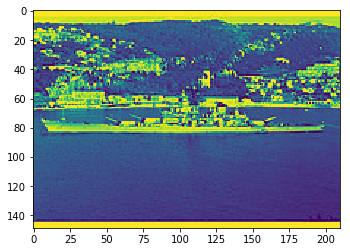

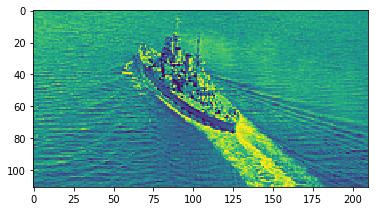

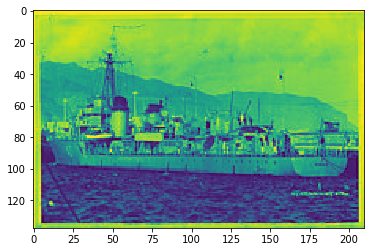

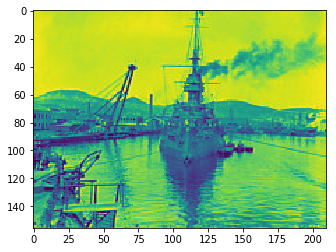

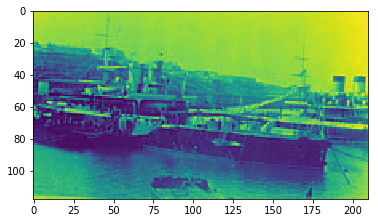

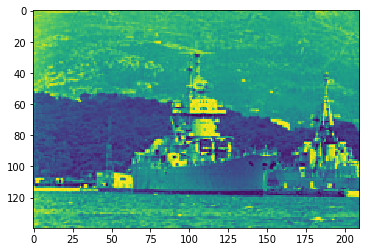

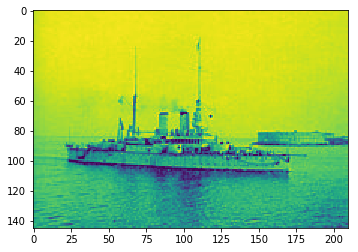

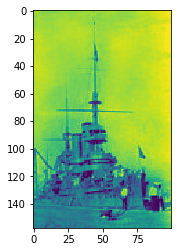

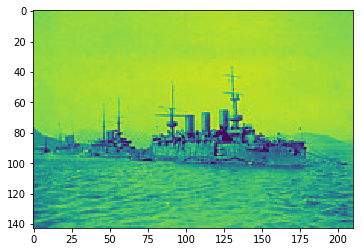

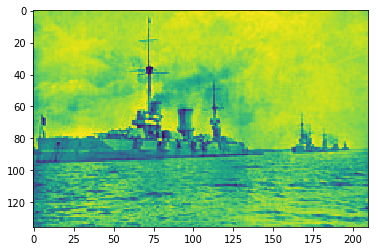

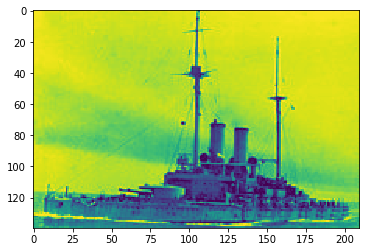

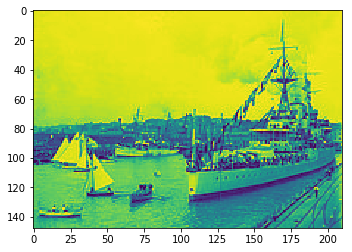

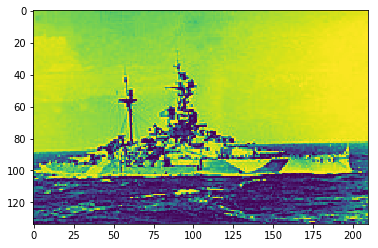

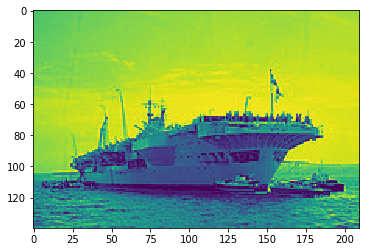

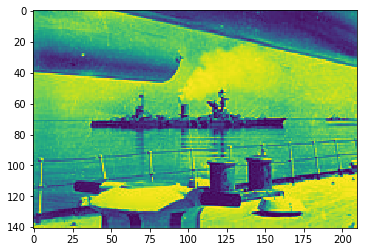

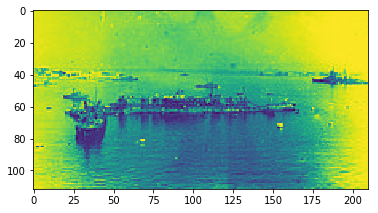

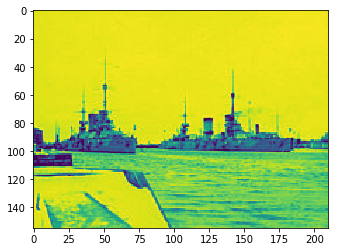

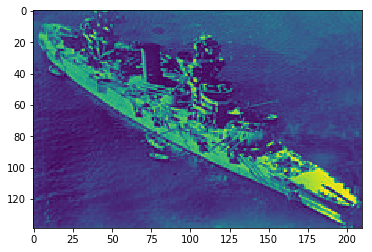

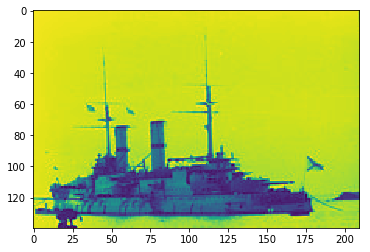

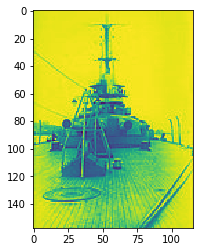

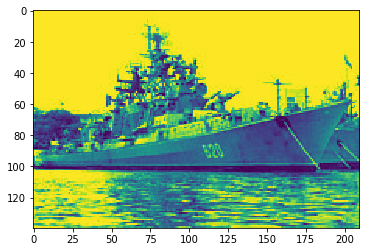

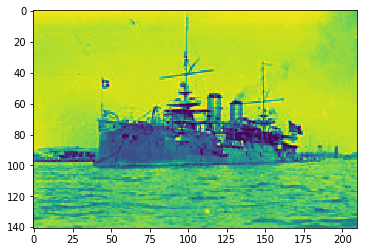

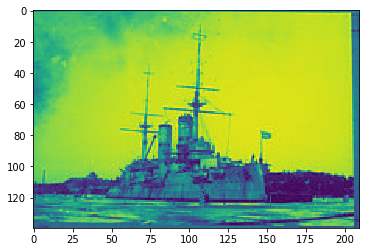

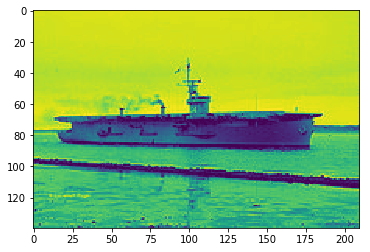

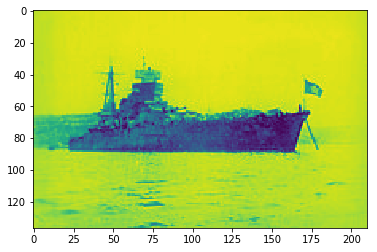

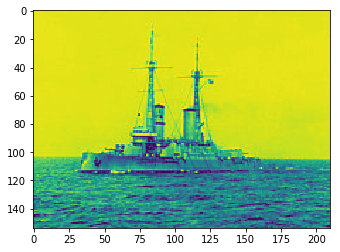

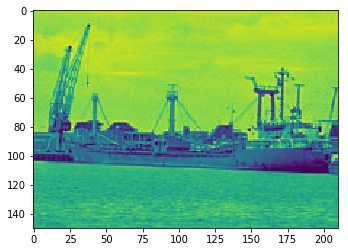

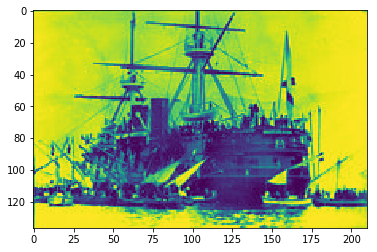

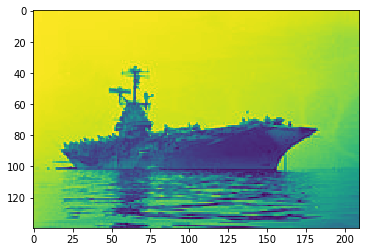

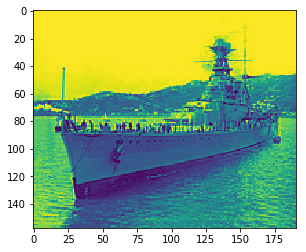

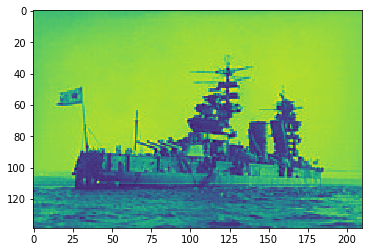

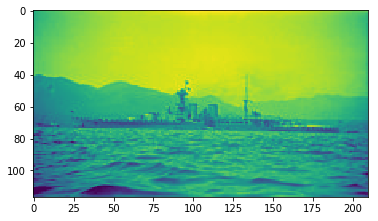

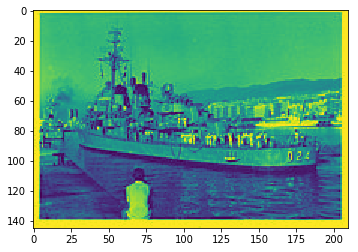

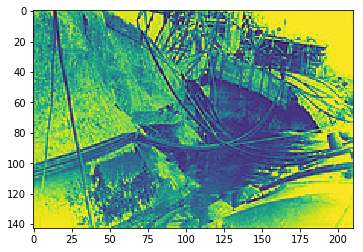

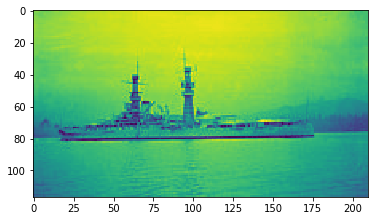

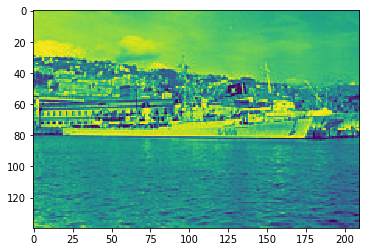

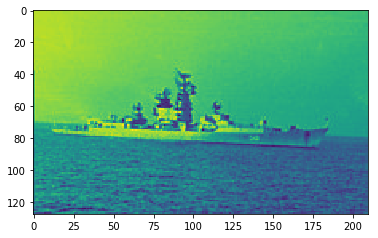

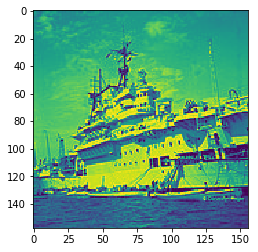

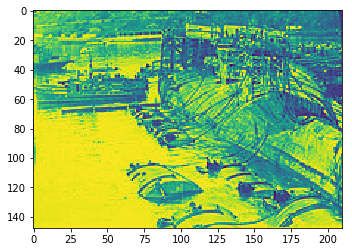

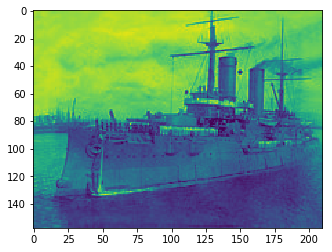

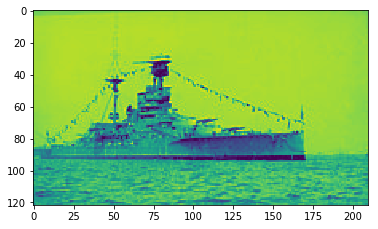

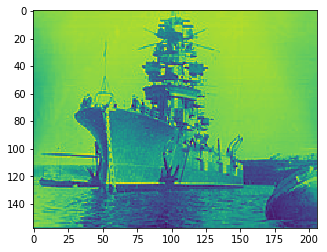

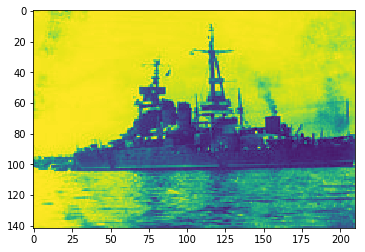

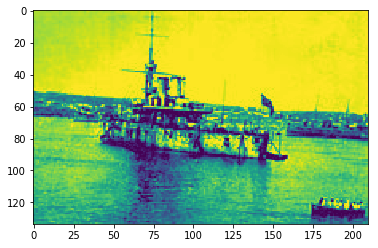

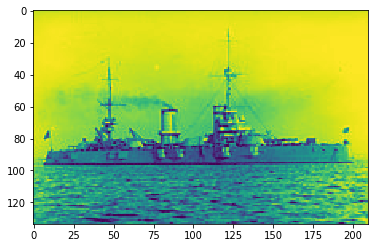

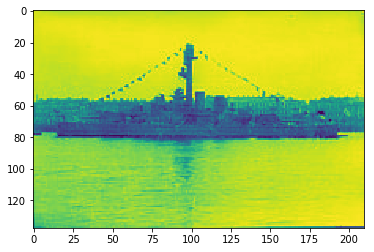

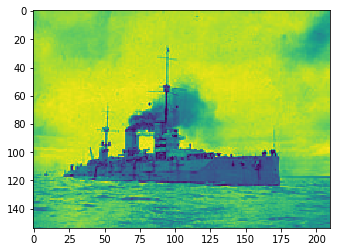

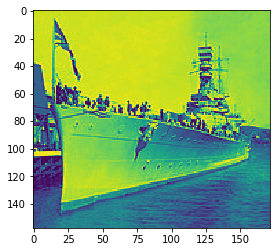

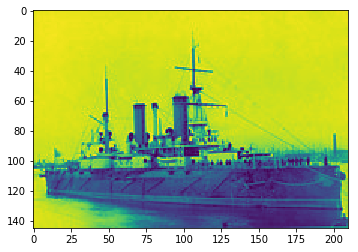

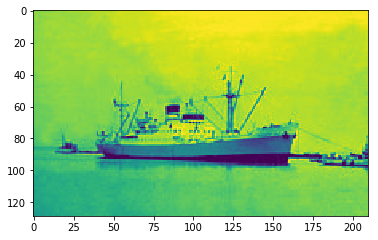

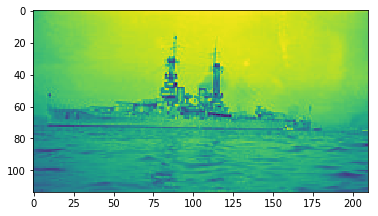

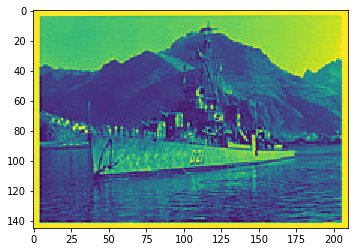

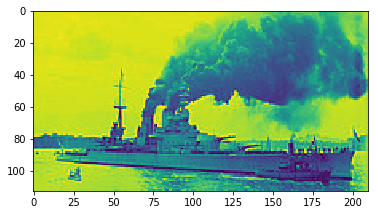

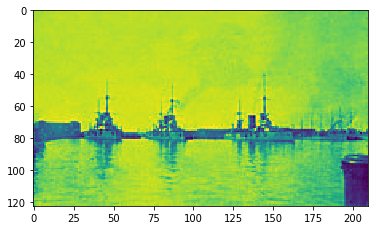

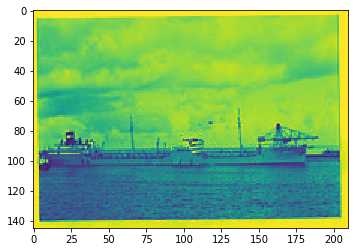

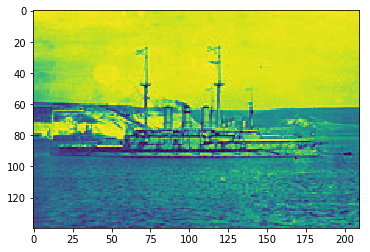

In [63]:
count = 0
for image in train_csv.raw:
  if(len(image.shape)==2):
    plt.imshow(image)
    plt.show()
    count += 1

In [64]:
count

104

In [65]:
count/len(train_csv)

0.016634676903390915